In [3]:
import pandas as pd
data = r'C:\Users\adadi\OneDrive\Desktop\project_comp_lab\SouthCalifornia-1982-2011_Physics-of-Data.dat'
df = pd.read_csv(data, sep = ' ', names = ['Index', 'Prev_event', 'Time', 'Magnitude', 'x', 'y', 'z'])


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import plotly.express as px
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import seaborn as sns
import numpy.linalg as la

# PCA ANALYSIS

Now we are going to perform the PCA analysis, in order to reduce the dimensionality of the dataset deleting the less representing variable.
First of all, let's construct the covariance matrix: it is showing the correlation between the variables of the set. In particular, we are considering in our analysis the coordinates of points (x, y and z).


Text(0.5, 1.0, 'Covariance matrix')

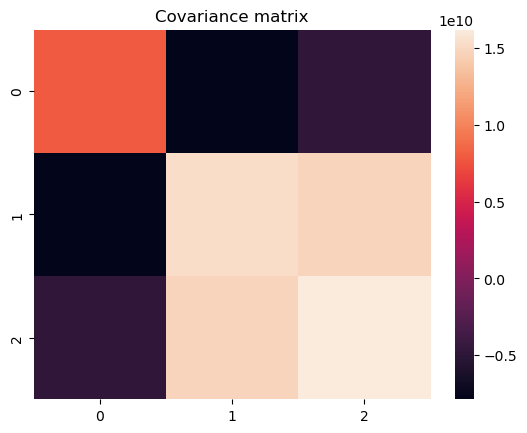

In [5]:
#Now let's perform the PCA analysis 
PCA_array = np.array(df)[:, 4:7] #coordinate x, y e z del dataset 

covariance_matrix = np.cov(PCA_array.T)
sns.heatmap(covariance_matrix)
plt.title('Covariance matrix')


In [7]:
x1, x2, x3 = PCA_array[:, 0], PCA_array[:, 1], PCA_array[:, 2]

#Centering the data
mean_x1 = np.mean(x1)
mean_x2 = np.mean(x2)
mean_x3 = np.mean(x3)

x1 = x1 - mean_x1 
x2 = x2 - mean_x2 
x3 = x3 - mean_x3 

l, V = la.eig(covariance_matrix)
V_svd = []
l_svd = []

new_PCA = np.concatenate([x1[:10000].reshape(10000, 1),x2[:10000].reshape(10000, 1),x3[:10000].reshape(10000, 1)], axis = 1).T



for i in range(10):
    mask = [np.random.randint(low=0, high= np.shape(df)[0], size = 10000)]

    new_PCA = np.concatenate([x1[mask].reshape(10000, 1),x2[mask].reshape(10000, 1),x3[mask].reshape(10000, 1)], axis = 1).T

    U, spectrum, Vt = la.svd(new_PCA)

    l_svd_ = spectrum **2 / (np.shape(df)[0]+1)

    l_svd.append(l_svd_)
    V_svd.append(U)

    #print('------------------ Eigenvalues with svd ----------------\t \n', l_svd_/np.sum(l_svd_))
    #print('------------------ Eigenvectors with svd ----------------\t \n', U)

cov_mean  = np.mean(l_svd, axis = 0)
cov_mean = cov_mean/np.sum(cov_mean)
#print(cov_mean)
print('------------------ Eigenvalues with svd ----------------\t \n', cov_mean)
print('------------------ Eigenvectors with svd ----------------\t \n', np.mean(np.array(V_svd), axis = 0))

print('----------------- Eigenvalues -----------------\t \n ', l/covariance_matrix.trace())
print('----------------- Eigenvectors -----------------\t \n', V)


------------------ Eigenvalues with svd ----------------	 
 [8.52031474e-01 1.47258999e-01 7.09527437e-04]
------------------ Eigenvectors with svd ----------------	 
 [[-0.32970636 -0.85513156 -0.40002842]
 [ 0.67431368  0.0832405  -0.73373284]
 [ 0.66073545 -0.51166098  0.5491925 ]]
----------------- Eigenvalues -----------------	 
  [8.52163578e-01 1.47129636e-01 7.06786387e-04]
----------------- Eigenvectors -----------------	 
 [[-0.3294337   0.85523831 -0.40005108]
 [ 0.67429929 -0.08347451 -0.73372507]
 [ 0.66090386  0.51146792  0.54918727]]


**Projection in two dimensions:**

Now let's plot the data reducing the number of dimensions. 

In [11]:

i = l.argsort()[::-1]  #reordering from the smallest to the largest eigenvalue
V = V[:, i]

#Normalizing the eigenvalues 
normalized_l = l/covariance_matrix.trace()
somma = np.sum(l)
frac_x1, frac_x2, frac_x3 = l[0]/somma * 100 , l[1]/somma * 100 , l[2]/somma * 100

print('------------ Percentage contribution for different eigenvalues: ------------')
print("\n l1: %.2f" % frac_x1, '% \n', "l2: %.2f" % frac_x2, '% \n', "l3: %.2f" % frac_x3, '%')
print('Total percentage contribution from the eigenvectors: %.2f' % (frac_x1 + frac_x2 + frac_x3), '%')


------------ Percentage contribution for different eigenvalues: ------------

 l1: 85.22 % 
 l2: 14.71 % 
 l3: 0.07 %
Total percentage contribution from the eigenvectors: 100.00 %


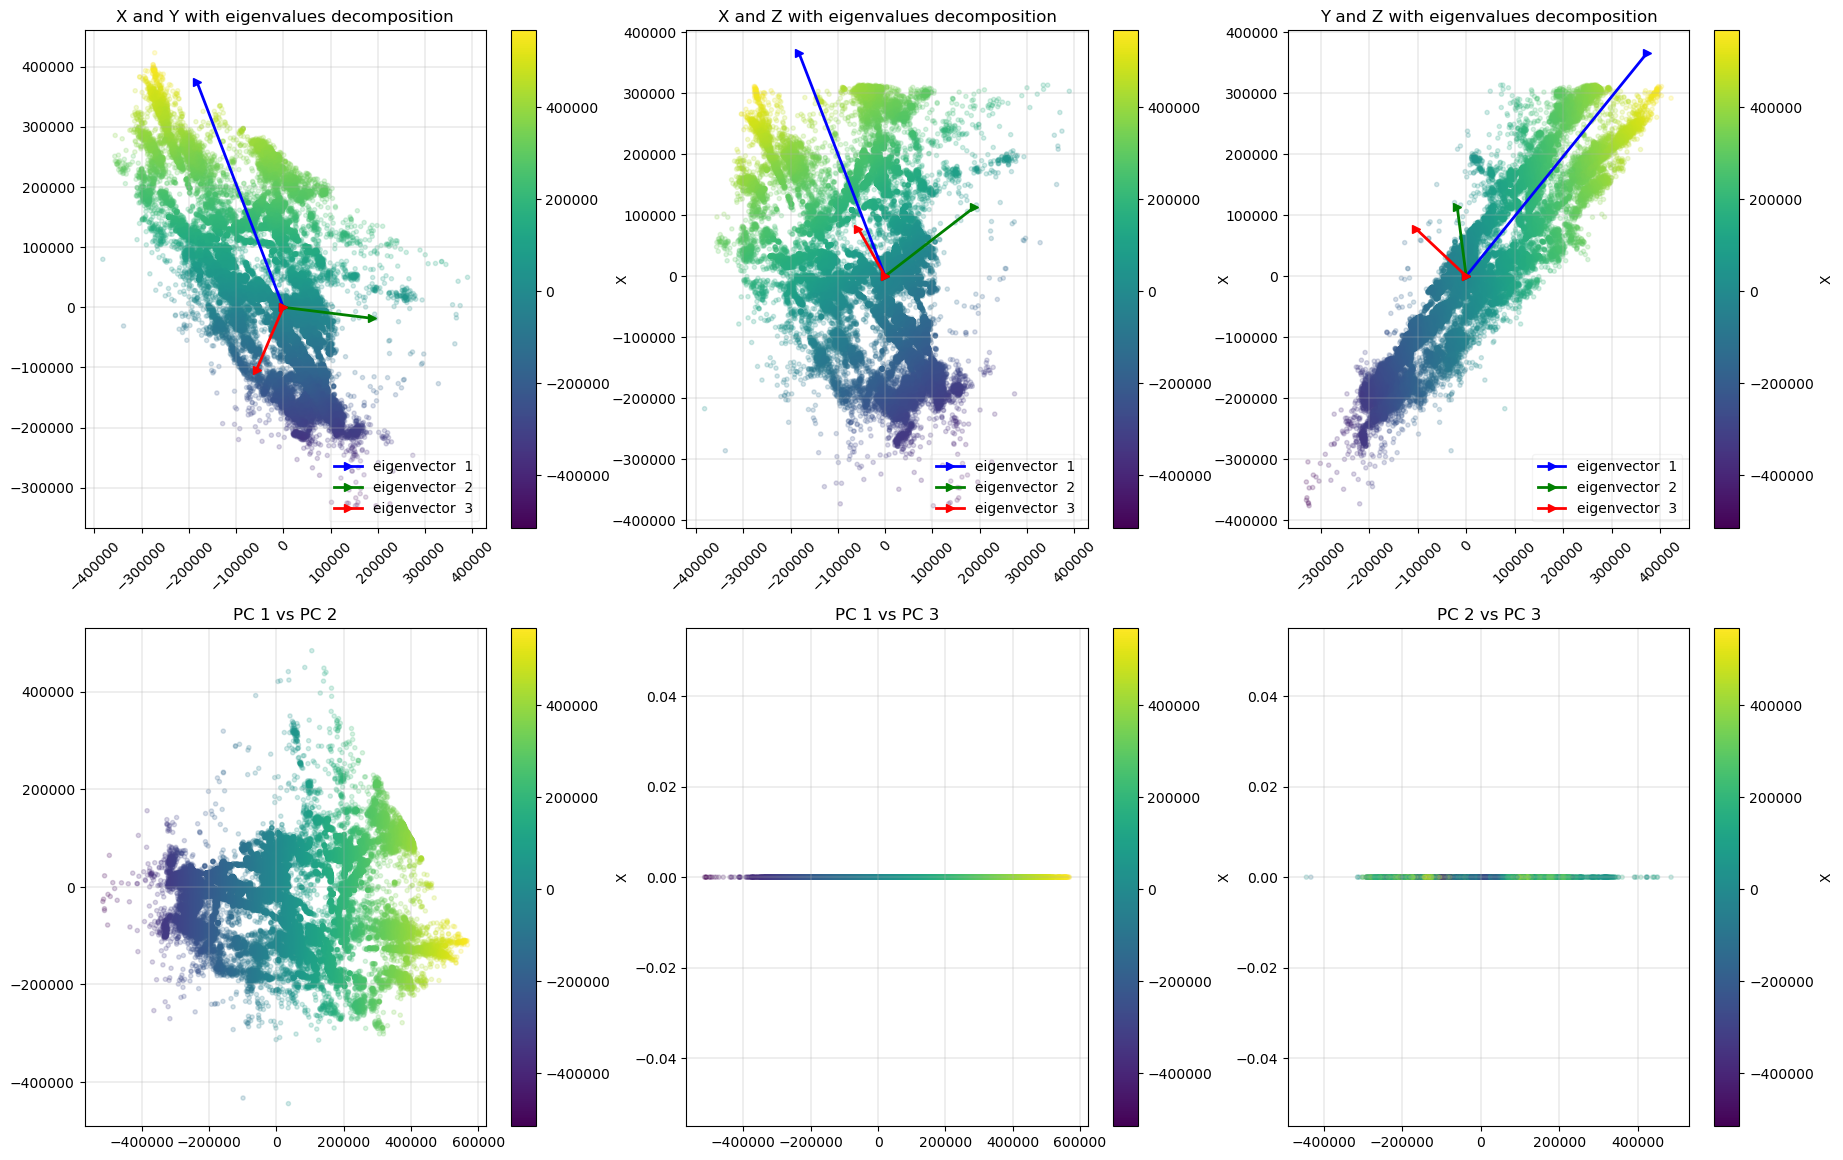

In [26]:
from matplotlib.cm import ScalarMappable

Xp = np.dot(V[:,:2].T, [x1, x2, x3]) 

Xp = np.vstack((Xp, np.zeros(Xp.shape[1])))


plt.figure(figsize=(22,22))


plt.subplot(334)


norm = plt.Normalize(Xp[0,:].min(), Xp[0,:].max())
cmap = plt.get_cmap('viridis')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.scatter(Xp[0,:], Xp[1,:], alpha=0.2, marker = '.', c = Xp[0,:], cmap = cmap, norm = norm)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('X')

'''
counter = 1
for li, vi, si, ci in zip(normalized_l, V.T, scale_factor, colors):
    plt.plot([0, si*li*vi[0]], [0, si*li*vi[1]], ci, lw = 2, marker='>', label = 'eigenvector  ' + str(counter))
    counter += 1

'''
plt.title('PC 1 vs PC 2')
plt.grid(True, linewidth=0.3)

plt.subplot(335)



norm = plt.Normalize(Xp[0,:].min(), Xp[0,:].max())
cmap = plt.get_cmap('viridis')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.scatter(Xp[0,:], Xp[2,:], alpha = 0.2, marker = '.', c = Xp[0,:], cmap = cmap, norm = norm)

'''
counter = 1
for li, vi, si, ci in zip(normalized_l, V.T, scale_factor, colors):
    plt.plot([0, si*li*vi[0]], [0, si*li*vi[2]], ci, lw = 2, marker='>', label = 'eigenvector  ' + str(counter)) #proiezione degli autovettori nel piano (x, z)
    counter += 1

'''

cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('X')
plt.title('PC 1 vs PC 3')
plt.grid(True, linewidth=0.3)

plt.subplot(336)


norm = plt.Normalize(Xp[0,:].min(), Xp[0,:].max())
cmap = plt.get_cmap('viridis')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.scatter(Xp[1,:], Xp[2,:], alpha = 0.2, marker = '.', c = Xp[0,:], cmap = cmap, norm = norm)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('X')
plt.title('PC 2 vs PC 3')
plt.grid(True, linewidth=0.3)


scale_factor =[650000, 1500000, 200000000]
colors = ['blue', 'green', 'red']




plt.subplot(331)

norm = plt.Normalize(Xp[0,:].min(), Xp[0,:].max())
cmap = plt.get_cmap('viridis')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.scatter(x1, x2, c = Xp[0,:], alpha = 0.2, marker = '.', cmap = cmap, norm = norm)
plt.xticks(rotation=45)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('X')


counter = 1
for li, vi, si, ci in zip(normalized_l, V.T, scale_factor, colors):
    plt.plot([0, si*li*vi[0]], [0, si*li*vi[1]], ci, lw = 2, marker='>', label = 'eigenvector  ' + str(counter))
    counter += 1

plt.title('X and Y with eigenvalues decomposition')
plt.grid(True, linewidth=0.3)
legend = plt.legend(loc='lower right')
legend.get_frame().set_alpha(0.2)

plt.subplot(332)

norm = plt.Normalize(Xp[0,:].min(), Xp[0,:].max())
cmap = plt.get_cmap('viridis')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.scatter(x1, x3, c = Xp[0,:], alpha = 0.2, marker = '.', cmap = cmap, norm = norm)
plt.xticks(rotation=45)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('X')

counter = 1
for li, vi, si, ci in zip(normalized_l, V.T, scale_factor, colors):
    plt.plot([0, si*li*vi[0]], [0, si*li*vi[2]], ci, lw = 2, marker='>', label = 'eigenvector  ' + str(counter)) #proiezione degli autovettori nel piano (x, z)
    counter += 1

plt.title('X and Z with eigenvalues decomposition')
plt.grid(True, linewidth=0.3)
legend = plt.legend(loc='lower right')
legend.get_frame().set_alpha(0.2)

plt.subplot(333)

norm = plt.Normalize(Xp[0,:].min(), Xp[0,:].max())
cmap = plt.get_cmap('viridis')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.scatter(x2, x3, c = Xp[0,:], alpha = 0.2, marker = '.', cmap = cmap, norm = norm)
plt.xticks(rotation=45)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('X')

counter = 1
for li, vi, si, ci in zip(normalized_l, V.T, scale_factor, colors):
    plt.plot([0, si*li*vi[1]], [0, si*li*vi[2]], ci, lw = 2, marker='>', label = 'eigenvector  ' + str(counter)) #proiezione degli autovettori nel piano (y, z)
    counter += 1

plt.title('Y and Z with eigenvalues decomposition')
plt.grid(True, linewidth=0.3)
legend = plt.legend(loc='lower right')
legend.get_frame().set_alpha(0.2)


plt.show()



How it is possible to observe, the contribution given by the third coordinate is the smallest, so it can be removed applying the PCA.
In the subplot we show the dimensions before and after the PCA with the corresponding eigenvectors.

The transformed covariance matrix presents only two elements along the first principal diagonal, while the third dimension is removed after applying PCA.


Text(0.5, 1.0, 'Transformed covariance matrix')

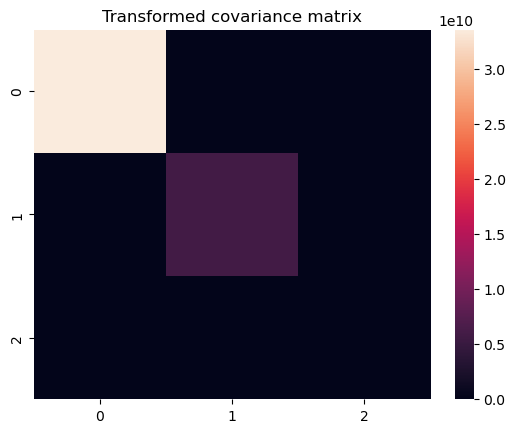

In [22]:
n_obs,  n_col = Xp.shape 
Xp_2D = np.reshape(Xp, (n_obs,  n_col))
cov = np.cov(Xp_2D)
sns.heatmap(cov)
plt.title('Transformed covariance matrix')

In [25]:
from networkx.drawing.nx_agraph import graphviz_layout